# **The Blue Sky Challenge**

## *Forecasting Sensor Measurements in Smart Air Aquality Monitoring System*

## Goal: Temporal forecasting of temperature and Carbon Monoxide (CO) sensor data one day ahead

### Dataset

Dataset is taken from https://www.kaggle.com/fedesoriano/air-quality-data-set?select=AirQuality.csv It contanins historical data of CO level and Temperatures.
Goal is to carry out day ahead univariate forecasting for CO and Temperature value. Dataset has been cleaned in excel and missing values have been replaced with mean of before and after values.
github : https://github.com/hamzahshabbir96/Temporal-forecasting-of-temperature-and-Carbon-Monoxide-CO-sensor-data-one-day-ahead

### Data exploration

#### Import important libraries

In [1015]:
import pandas as pd
from datetime import datetime
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX

<AxesSubplot:>

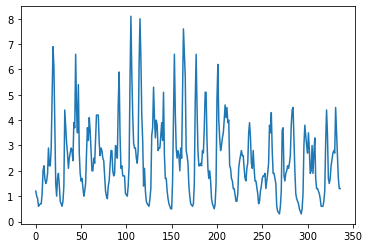

In [1016]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading data in the form of dataframe
file=pd.read_excel('data.xlsx')

# Extracting CO data
CO_data=file['CO']

#visualizing CO data
CO_data.plot()

<AxesSubplot:>

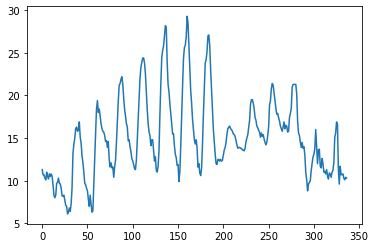

In [3]:
# Extracting Temperature data
Temp_data=file['Temp']
#visualizing Temperature data
Temp_data.plot()

### Proposed solution

For univariate forecasting, there are many possibilities such as LSTM (Long Short-Term Memory), Autoregressive integrated moving average(ARIMA), Seasonal Autoregressive integrated moving average (SARIMA) etc. Given data has very short training period (7-13 days) and by looking at our data, we can see there is huge change in Temperature after 18th of March. LSTM will not be a good idea because of limitation in training period and ARIMA model does not takes into account seasonality and we can see there is seasonality of 24 hours in our dataset. Our data also consits of lot of noises so best option will be **Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors**,which also takes noise factor into account. SARIMAX will reduces error more on test data as compared to other model.

## Performance measure function(Mean absolute percentage error)

In [1017]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://raw.githubusercontent.com/hamzahshabbir96/Temporal-forecasting-of-temperature-and-Carbon-Monoxide-CO-sensor-data-one-day-ahead/main/images/mape.png", width=800, height=600)

###### source https://lindevs.com/calculate-mean-absolute-percentage-error-using-tensorflow-2/

In [1018]:
import numpy as np
import matplotlib.pyplot as plt
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [1019]:
import pandas as pd
file=pd.read_excel('data.xlsx')

In [1020]:
#file['Temp'].plot()
file.head()

,Date,Time,CO,Temp
0,2004-03-11,00.00.00,1.20,11.3
1,2004-03-11,01.00.00,1.00,10.7
2,2004-03-11,02.00.00,0.90,10.7
3,2004-03-11,03.00.00,0.60,10.3
4,2004-03-11,04.00.00,0.65,10.1


In [923]:
# 
date=[]
mape_co=[]
mape_temp=[]

## Prediction for 18th of March

### Preparation of dataset

In [1021]:
start_date = "2004-03-11"
end_date = "2004-03-17"
#Preparation of Train dataset
train_17th=file[file['Date'] <= end_date]
train_17th_CO = train_17th['CO']
train_17th_Temp = train_17th['Temp']
#Preparation of Test dataset

test_date = "2004-03-18"

test_18th_real_CO=file[file['Date'] <= test_date][['Date','Time','CO']].reset_index()
test_18th_real_Temp=file[file['Date'] <= test_date][['Date','Time','Temp']].reset_index()



<AxesSubplot:>

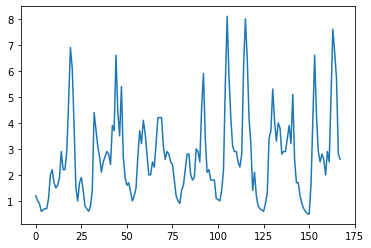

In [1022]:
train_17th_CO.plot()

In [56]:
test_18th_real_Temp.shape

(192, 2)

### Model training

In [1023]:
model_CO = SARIMAX(train_17th_CO, order=(6,0,3), seasonal_order=(1,1,1, 24), 
                                  enforce_stationarity=False, enforce_invertibility=False).fit()


C:\Users\Hamzah\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [926]:
model_Temp = SARIMAX(train_17th_Temp, order=(5,0,1), seasonal_order=(1,1, 1, 24), 
                                  enforce_stationarity=False, enforce_invertibility=False).fit()


### Model evaluation

In [1013]:
print(model_CO.summary())
#model_CO.plot_diagnostics(figsize=(15,12))

                                     SARIMAX Results                                      
Dep. Variable:                                 CO   No. Observations:                  312
Model:             SARIMAX(2, 0, 1)x(1, 0, 1, 24)   Log Likelihood                -320.765
Date:                            Fri, 28 Jan 2022   AIC                            653.530
Time:                                    15:13:18   BIC                            675.466
Sample:                                         0   HQIC                           662.323
                                            - 312                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0865      0.294      0.294      0.769      -0.490       0.663
ar.L2          0.3406      0.239   

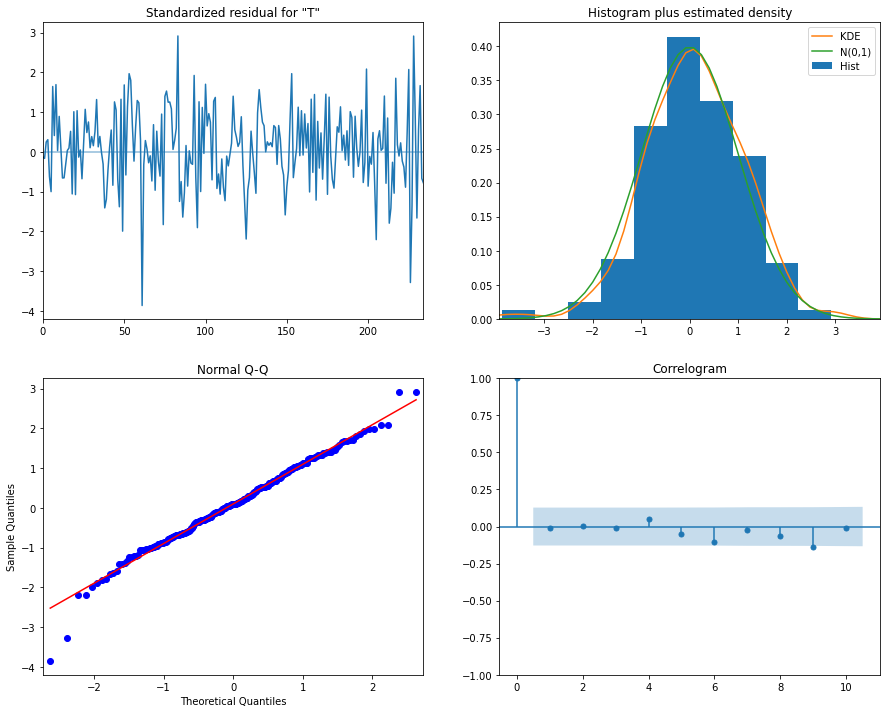

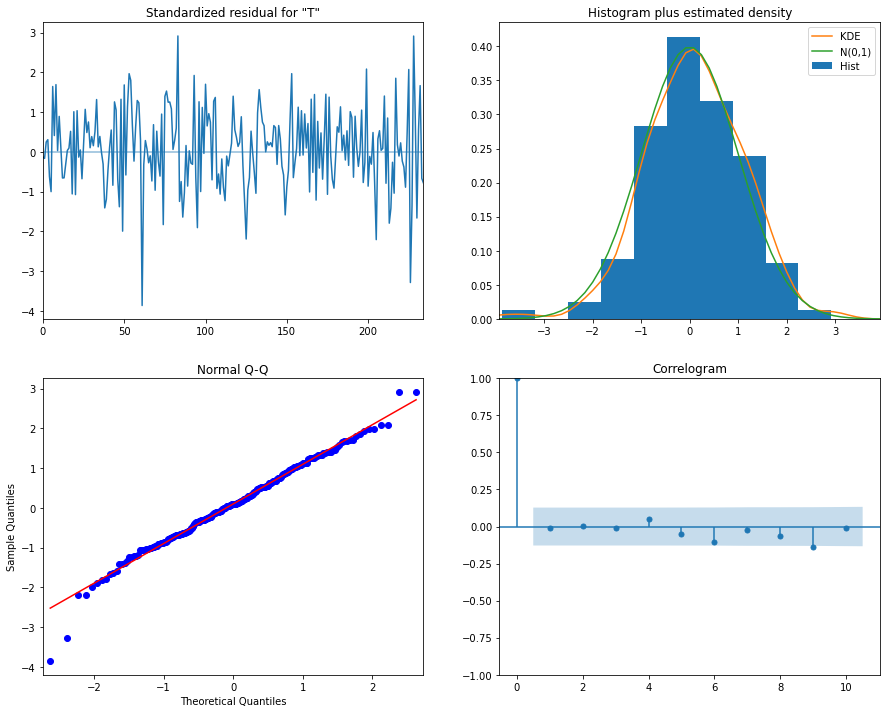

In [1024]:
#print(model_Temo.summary())
model_Temp.plot_diagnostics(figsize=(15,12))

### Model Prediction

In [934]:
# CO
predict_CO=model_CO.predict(0,test_18th_real_CO.shape[0])
test_18th_real_CO['Predicted CO']=predict_CO

In [928]:
# Temp
predict_Temp=model_Temp.predict(0,test_18th_real_Temp.shape[0])
test_18th_real_Temp['Predicted Temp']=predict_Temp

### Graphical comparison (CO)

No handles with labels found to put in legend.


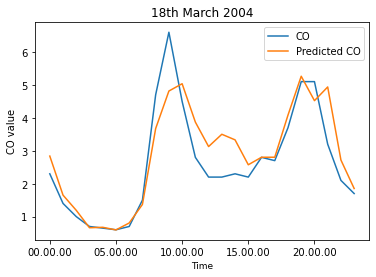

In [935]:
test_date = "2004-03-18"
ax = plt.gca()
ax.set_xlabel("Time",fontsize=9)
ax.set_ylabel("CO value",fontsize=10)
ax.set_title('18th March 2004',fontsize=12);

plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
ax.tick_params(axis='both', which='minor', labelsize=6)
plt.legend(loc=2, prop={'size':10})


test_18th_real_CO[test_18th_real_CO['Date'] >=  test_date].plot(kind='line',x='Time',y=['CO'],ax=ax)
test_18th_real_CO[test_18th_real_CO['Date'] >= test_date].plot(kind='line',x='Time',y=['Predicted CO'],ax=ax)
#df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)

plt.show()


### Graphical comparison (Temp)

No handles with labels found to put in legend.


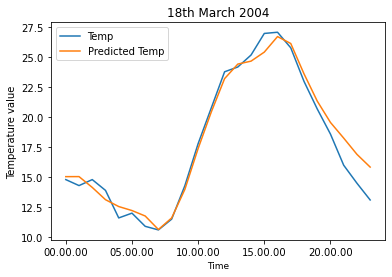

In [930]:
test_date = "2004-03-18"
ax = plt.gca()
ax.set_xlabel("Time",fontsize=9)
ax.set_ylabel("Temperature value",fontsize=10)
ax.set_title('18th March 2004',fontsize=12);

plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
ax.tick_params(axis='both', which='minor', labelsize=6)
plt.legend(loc=2, prop={'size':10})


test_18th_real_Temp[test_18th_real_Temp['Date'] >=  test_date].plot(kind='line',x='Time',y=['Temp'],ax=ax)
test_18th_real_Temp[test_18th_real_Temp['Date'] >= test_date].plot(kind='line',x='Time',y=['Predicted Temp'],ax=ax)
#df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)

plt.show()

## Performance analysis

#### CO MAPE

In [936]:
MAPE_18th_CO=mean_absolute_percentage_error(test_18th_real_CO[test_18th_real_CO['Date'] >=  test_date]['CO'],test_18th_real_CO[test_18th_real_CO['Date'] >=  test_date]['Predicted CO'])
MAPE_18th_CO


19.925034620450642

#### Temp MAPE

In [932]:
MAPE_18th_Temp=mean_absolute_percentage_error(test_18th_real_Temp[test_18th_real_Temp['Date'] >=  test_date]['Temp'],test_18th_real_Temp[test_18th_real_Temp['Date'] >=  test_date]['Predicted Temp'])
MAPE_18th_Temp

4.952774060389146

In [937]:
date.append(test_date)
mape_co.append(MAPE_18th_CO)
mape_temp.append(MAPE_18th_Temp)

## Prediction for 19th of March

### Preparation of dataset

In [938]:
start_date = "2004-03-11"
end_date = "2004-03-18"
#Preparation of Train dataset
train_18th=file[file['Date'] <= end_date]
train_18th_CO = train_18th['CO']
train_18th_Temp = train_18th['Temp']
#Preparation of Test dataset

test_date = "2004-03-19"

test_19th_real_CO=file[file['Date'] <= test_date][['Date','Time','CO']].reset_index()
test_19th_real_Temp=file[file['Date'] <= test_date][['Date','Time','Temp']].reset_index()


In [102]:
test_19th_real_Temp.shape

(216, 4)

### Model Training

In [939]:
model_CO = SARIMAX(train_18th_CO, order=(4,0,1), seasonal_order=(2, 1, 0, 24), 
                                  enforce_stationarity=False, enforce_invertibility=False).fit()


In [940]:
model_Temp = SARIMAX(train_18th_Temp, order=(7,0,0), seasonal_order=(1, 0,0, 24), 
                                  enforce_stationarity=False, enforce_invertibility=False).fit()


### Model evaluation

In [291]:
#print(model_CO.summary())
#model_CO.plot_diagnostics(figsize=(15,12))

In [38]:
#print(model_Temo.summary())
#model_Temp.plot_diagnostics(figsize=(15,12))

### Model Prediction

In [941]:
# CO
predict_CO=model_CO.predict(0,test_19th_real_CO.shape[0])
test_19th_real_CO['Predicted CO']=predict_CO

In [942]:
# Temp
predict_Temp=model_Temp.predict(0,test_19th_real_Temp.shape[0])
test_19th_real_Temp['Predicted Temp']=predict_Temp

### Graphical comparison (CO)

No handles with labels found to put in legend.


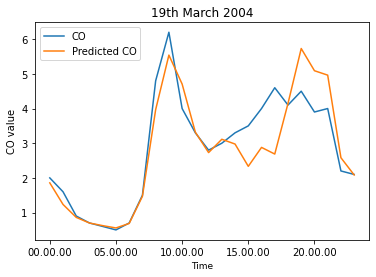

In [943]:
test_date = "2004-03-19"
ax = plt.gca()
ax.set_xlabel("Time",fontsize=9)
ax.set_ylabel("CO value",fontsize=10)
ax.set_title('19th March 2004',fontsize=12);

plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
ax.tick_params(axis='both', which='minor', labelsize=6)
plt.legend(loc=2, prop={'size':10})


test_19th_real_CO[test_19th_real_CO['Date'] >=  test_date].plot(kind='line',x='Time',y=['CO'],ax=ax)
test_19th_real_CO[test_19th_real_CO['Date'] >= test_date].plot(kind='line',x='Time',y=['Predicted CO'],ax=ax)
#df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)

plt.show()


### Graphical comparison (Temp)

No handles with labels found to put in legend.


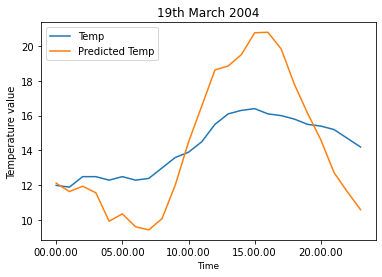

In [944]:
test_date = "2004-03-19"
ax = plt.gca()
ax.set_xlabel("Time",fontsize=9)
ax.set_ylabel("Temperature value",fontsize=10)
ax.set_title('19th March 2004',fontsize=12);

plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
ax.tick_params(axis='both', which='minor', labelsize=6)
plt.legend(loc=2, prop={'size':10})


test_19th_real_Temp[test_19th_real_Temp['Date'] >=  test_date].plot(kind='line',x='Time',y=['Temp'],ax=ax)
test_19th_real_Temp[test_19th_real_Temp['Date'] >= test_date].plot(kind='line',x='Time',y=['Predicted Temp'],ax=ax)
#df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)

plt.show()

## Performance analysis

#### CO MAPE

In [945]:
MAPE_19th_CO=mean_absolute_percentage_error(test_19th_real_CO[test_19th_real_CO['Date'] >=  test_date]['CO'],test_19th_real_CO[test_19th_real_CO['Date'] >=  test_date]['Predicted CO'])
MAPE_19th_CO

13.339459212882604

#### Temp MAPE

In [946]:
MAPE_19th_Temp=mean_absolute_percentage_error(test_19th_real_Temp[test_19th_real_Temp['Date'] >=  test_date]['Temp'],test_19th_real_Temp[test_19th_real_Temp['Date'] >=  test_date]['Predicted Temp'])
MAPE_19th_Temp

15.401401253753994

In [947]:
date.append(test_date)
mape_co.append(MAPE_19th_CO)
mape_temp.append(MAPE_19th_Temp)

## Prediction for 20th of March

### Preparation of dataset

In [948]:
start_date = "2004-03-11"
end_date = "2004-03-19"
#Preparation of Train dataset
train_19th=file[file['Date'] <= end_date]
train_19th_CO = train_19th['CO']
train_19th_Temp = train_19th['Temp']
#Preparation of Test dataset

test_date = "2004-03-20"

test_20th_real_CO=file[file['Date'] <= test_date][['Date','Time','CO']].reset_index()
test_20th_real_Temp=file[file['Date'] <= test_date][['Date','Time','Temp']].reset_index()


In [102]:
test_19th_real_Temp.shape

(216, 4)

### Model Training

In [949]:
model_CO = SARIMAX(train_19th_CO, order=(4,0,1), seasonal_order=(1,0, 0, 24), 
                                  enforce_stationarity=False, enforce_invertibility=False).fit()


In [950]:
model_Temp = SARIMAX(train_19th_Temp, order=(3,0,1), seasonal_order=(1, 1, 0, 24), 
                                  enforce_stationarity=False, enforce_invertibility=False).fit()


### Model evaluation

In [15]:
#print(model_CO.summary())
#model_CO.plot_diagnostics(figsize=(15,12))

In [38]:
#print(model_Temo.summary())
#model_Temp.plot_diagnostics(figsize=(15,12))

### Model Prediction

In [951]:
# CO
predict_CO=model_CO.predict(0,test_20th_real_CO.shape[0])
test_20th_real_CO['Predicted CO']=predict_CO

In [952]:
# Temp
predict_Temp=model_Temp.predict(0,test_20th_real_Temp.shape[0])
test_20th_real_Temp['Predicted Temp']=predict_Temp

### Graphical comparison (CO)

No handles with labels found to put in legend.


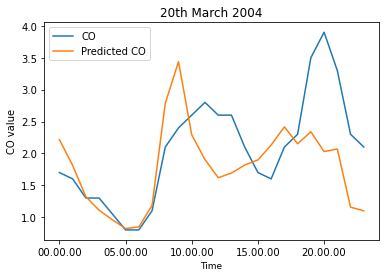

In [953]:
test_date = "2004-03-20"
ax = plt.gca()
ax.set_xlabel("Time",fontsize=9)
ax.set_ylabel("CO value",fontsize=10)
ax.set_title('20th March 2004',fontsize=12);

plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
ax.tick_params(axis='both', which='minor', labelsize=6)
plt.legend(loc=2, prop={'size':10})


test_20th_real_CO[test_20th_real_CO['Date'] >=  test_date].plot(kind='line',x='Time',y=['CO'],ax=ax)
test_20th_real_CO[test_20th_real_CO['Date'] >= test_date].plot(kind='line',x='Time',y=['Predicted CO'],ax=ax)
#df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)

plt.show()


### Graphical comparison (Temp)

No handles with labels found to put in legend.


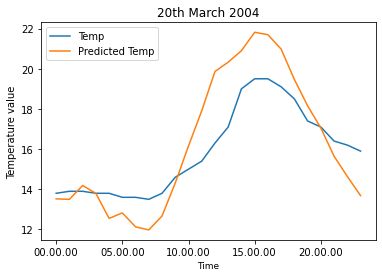

In [954]:
test_date = "2004-03-20"
ax = plt.gca()
ax.set_xlabel("Time",fontsize=9)
ax.set_ylabel("Temperature value",fontsize=10)
ax.set_title('20th March 2004',fontsize=12);

plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
ax.tick_params(axis='both', which='minor', labelsize=6)
plt.legend(loc=2, prop={'size':10})


test_20th_real_Temp[test_20th_real_Temp['Date'] >=  test_date].plot(kind='line',x='Time',y=['Temp'],ax=ax)
test_20th_real_Temp[test_20th_real_Temp['Date'] >= test_date].plot(kind='line',x='Time',y=['Predicted Temp'],ax=ax)
#df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)

plt.show()

## Performance analysis

#### CO MAPE

In [955]:
MAPE_20th_CO=mean_absolute_percentage_error(test_20th_real_CO[test_20th_real_CO['Date'] >=  test_date]['CO'],test_20th_real_CO[test_20th_real_CO['Date'] >=  test_date]['Predicted CO'])
MAPE_20th_CO

23.864296010160622

#### Temp MAPE

In [956]:
MAPE_20th_Temp=mean_absolute_percentage_error(test_20th_real_Temp[test_20th_real_Temp['Date'] >=  test_date]['Temp'],test_20th_real_Temp[test_20th_real_Temp['Date'] >=  test_date]['Predicted Temp'])
MAPE_20th_Temp

8.320342107128202

In [957]:
date.append(test_date)
mape_co.append(MAPE_20th_CO)
mape_temp.append(MAPE_20th_Temp)

## Prediction for 21st of March

### Preparation of dataset

In [958]:
start_date = "2004-03-11"
end_date = "2004-03-20"
#Preparation of Train dataset
train_20th=file[file['Date'] <= end_date]
train_20th_CO = train_20th['CO']
train_20th_Temp = train_20th['Temp']
#Preparation of Test dataset

test_date = "2004-03-21"

test_21st_real_CO=file[file['Date'] <= test_date][['Date','Time','CO']].reset_index()
test_21st_real_Temp=file[file['Date'] <= test_date][['Date','Time','Temp']].reset_index()


### Model Training

In [959]:
model_CO = SARIMAX(train_20th_CO, order=(6,0,0), seasonal_order=(1, 0, 0, 24), 
                                  enforce_stationarity=False, enforce_invertibility=False).fit()


In [962]:
model_Temp = SARIMAX(train_20th_Temp, order=(3,0,1), seasonal_order=(2, 1, 0, 24), 
                                  enforce_stationarity=False, enforce_invertibility=False).fit()


### Model evaluation

In [15]:
#print(model_CO.summary())
#model_CO.plot_diagnostics(figsize=(15,12))

In [38]:
#print(model_Temo.summary())
#model_Temp.plot_diagnostics(figsize=(15,12))

### Model Prediction

In [963]:
# CO
predict_CO=model_CO.predict(0,test_21st_real_CO.shape[0])
test_21st_real_CO['Predicted CO']=predict_CO

In [964]:
# Temp
predict_Temp=model_Temp.predict(0,test_21st_real_Temp.shape[0])
test_21st_real_Temp['Predicted Temp']=predict_Temp

### Graphical comparison (CO)

No handles with labels found to put in legend.


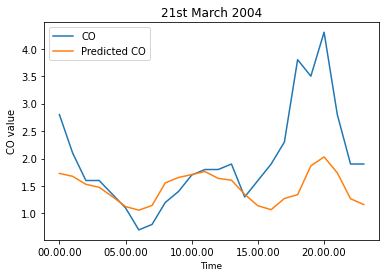

In [965]:
test_date = "2004-03-21"
ax = plt.gca()
ax.set_xlabel("Time",fontsize=9)
ax.set_ylabel("CO value",fontsize=10)
ax.set_title('21st March 2004',fontsize=12);

plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
ax.tick_params(axis='both', which='minor', labelsize=6)
plt.legend(loc=2, prop={'size':10})


test_21st_real_CO[test_21st_real_CO['Date'] >= test_date].plot(kind='line',x='Time',y=['CO'],ax=ax)
test_21st_real_CO[test_21st_real_CO['Date'] >= test_date].plot(kind='line',x='Time',y='Predicted CO',ax=ax)
#df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)

plt.show()


### Graphical comparison (Temp)

No handles with labels found to put in legend.


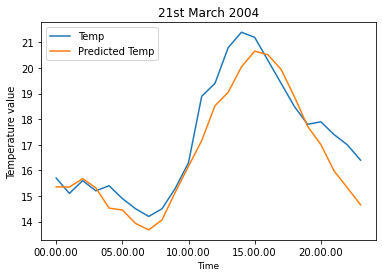

In [966]:
test_date = "2004-03-21"
ax = plt.gca()
ax.set_xlabel("Time",fontsize=9)
ax.set_ylabel("Temperature value",fontsize=10)
ax.set_title('21st March 2004',fontsize=12);

plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
ax.tick_params(axis='both', which='minor', labelsize=6)
plt.legend(loc=2, prop={'size':10})


test_21st_real_Temp[test_21st_real_Temp['Date'] >=  test_date].plot(kind='line',x='Time',y=['Temp'],ax=ax)
test_21st_real_Temp[test_21st_real_Temp['Date'] >= test_date].plot(kind='line',x='Time',y=['Predicted Temp'],ax=ax)
#df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)

plt.show()

## Performance analysis

#### CO MAPE

In [967]:
MAPE_21st_CO=mean_absolute_percentage_error(test_21st_real_CO[test_21st_real_CO['Date'] >=  test_date]['CO'],test_21st_real_CO[test_21st_real_CO['Date'] >=  test_date]['Predicted CO'])
MAPE_21st_CO

26.69522385371365

#### Temp MAPE

In [968]:
MAPE_21st_Temp=mean_absolute_percentage_error(test_21st_real_Temp[test_21st_real_Temp['Date'] >=  test_date]['Temp'],test_21st_real_Temp[test_21st_real_Temp['Date'] >=  test_date]['Predicted Temp'])
MAPE_21st_Temp

4.0533313127984325

In [969]:
date.append(test_date)
mape_co.append(MAPE_21st_CO)
mape_temp.append(MAPE_21st_Temp)

In [573]:
print(mape_co)

[19.925034620450642, 13.339459212882604, 23.864296010160622, 28.813108470357623]


## Prediction for 22nd of March

### Preparation of dataset

In [970]:
start_date = "2004-03-11"
end_date = "2004-03-21"
#Preparation of Train dataset
train_21st=file[file['Date'] <= end_date]
train_21st_CO = train_21st['CO']
train_21st_Temp = train_21st['Temp']
#Preparation of Test dataset

test_date = "2004-03-22"

test_22nd_real_CO=file[file['Date'] <= test_date][['Date','Time','CO']].reset_index()
test_22nd_real_Temp=file[file['Date'] <= test_date][['Date','Time','Temp']].reset_index()


### Model Training

In [971]:
model_CO = SARIMAX(train_21st_CO, order=(6,0,5), seasonal_order=(4, 0,0, 24), 
                                  enforce_stationarity=False, enforce_invertibility=False).fit()


C:\Users\Hamzah\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [972]:
model_Temp = SARIMAX(train_21st_Temp, order=(1,0,1), seasonal_order=(1, 0,1, 24), 
                                 enforce_stationarity=False, enforce_invertibility=False).fit()


### Model evaluation

In [15]:
#print(model_CO.summary())
#model_CO.plot_diagnostics(figsize=(15,12))

In [38]:
#print(model_Temo.summary())
#model_Temp.plot_diagnostics(figsize=(15,12))

### Model Prediction

In [973]:
# CO
predict_CO=model_CO.predict(0,test_22nd_real_CO.shape[0])
test_22nd_real_CO['Predicted CO']=predict_CO

In [974]:
# Temp
predict_Temp=model_Temp.predict(0,test_22nd_real_Temp.shape[0])
test_22nd_real_Temp['Predicted Temp']=predict_Temp

### Graphical comparison (CO)

No handles with labels found to put in legend.


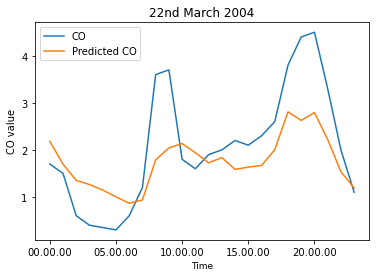

In [820]:
test_date = "2004-03-22"
ax = plt.gca()
ax.set_xlabel("Time",fontsize=9)
ax.set_ylabel("CO value",fontsize=10)
ax.set_title('22nd March 2004',fontsize=12);

plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
ax.tick_params(axis='both', which='minor', labelsize=6)
plt.legend(loc=2, prop={'size':10})


test_22nd_real_CO[test_22nd_real_CO['Date'] >=  test_date].plot(kind='line',x='Time',y=['CO'],ax=ax)
test_22nd_real_CO[test_22nd_real_CO['Date'] >= test_date].plot(kind='line',x='Time',y=['Predicted CO'],ax=ax)
#df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)

plt.show()


### Graphical comparison (Temp)

No handles with labels found to put in legend.


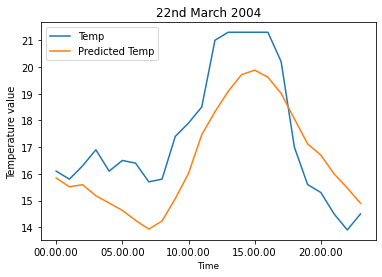

In [975]:
test_date = "2004-03-22"
ax = plt.gca()
ax.set_xlabel("Time",fontsize=9)
ax.set_ylabel("Temperature value",fontsize=10)
ax.set_title('22nd March 2004',fontsize=12);

plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
ax.tick_params(axis='both', which='minor', labelsize=6)
plt.legend(loc=2, prop={'size':10})


test_22nd_real_Temp[test_22nd_real_Temp['Date'] >=  test_date].plot(kind='line',x='Time',y=['Temp'],ax=ax)
test_22nd_real_Temp[test_22nd_real_Temp['Date'] >= test_date].plot(kind='line',x='Time',y=['Predicted Temp'],ax=ax)
#df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)

plt.show()

## Performance analysis

#### CO MAPE

In [976]:
MAPE_22nd_CO=mean_absolute_percentage_error(test_22nd_real_CO[test_22nd_real_CO['Date'] >=  test_date]['CO'],test_22nd_real_CO[test_22nd_real_CO['Date'] >=  test_date]['Predicted CO'])
MAPE_22nd_CO

32.11969524162115

In [977]:
#test_22nd_real_CO[test_22nd_real_CO['Date'] >=  test_date]

In [627]:
#test_22nd_real_CO[test_22nd_real_CO['Date'] >=  test_date]

#### Temp MAPE

In [978]:
MAPE_22nd_Temp=mean_absolute_percentage_error(test_22nd_real_Temp[test_22nd_real_Temp['Date'] >=  test_date]['Temp'],test_22nd_real_Temp[test_22nd_real_Temp['Date'] >=  test_date]['Predicted Temp'])
MAPE_22nd_Temp

8.37375544444045

In [979]:
date.append(test_date)
mape_co.append(MAPE_22nd_CO)
mape_temp.append(MAPE_22nd_Temp)

## Prediction for 23rd of March

### Preparation of dataset

In [980]:
start_date = "2004-03-11"
end_date = "2004-03-22"
#Preparation of Train dataset
train_22nd=file[file['Date'] <= end_date]
train_22nd_CO = train_22nd['CO']
train_22nd_Temp = train_22nd['Temp']
#Preparation of Test dataset

test_date = "2004-03-23"

test_23rd_real_CO=file[file['Date'] <= test_date][['Date','Time','CO']].reset_index()
test_23rd_real_Temp=file[file['Date'] <= test_date][['Date','Time','Temp']].reset_index()


### Model Training

In [989]:
model_CO = SARIMAX(train_22nd_CO, order=(3,0,2), seasonal_order=(5, 0, 2, 24), 
                                  enforce_stationarity=False, enforce_invertibility=False).fit()


C:\Users\Hamzah\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [982]:
model_Temp = SARIMAX(train_22nd_Temp, order=(5,0,1), seasonal_order=(2, 0,1, 24), 
                                  enforce_stationarity=False, enforce_invertibility=False).fit()


C:\Users\Hamzah\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Model evaluation

In [15]:
#print(model_CO.summary())
#model_CO.plot_diagnostics(figsize=(15,12))

In [38]:
#print(model_Temo.summary())
#model_Temp.plot_diagnostics(figsize=(15,12))

### Model Prediction

In [991]:
# CO
predict_CO=model_CO.predict(0,test_23rd_real_CO.shape[0])
test_23rd_real_CO['Predicted CO']=predict_CO

In [984]:
# Temp
predict_Temp=model_Temp.predict(0,test_23rd_real_Temp.shape[0])
test_23rd_real_Temp['Predicted Temp']=predict_Temp

### Graphical comparison (CO)

No handles with labels found to put in legend.


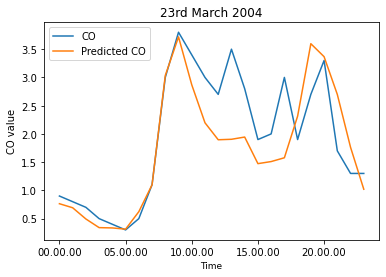

In [992]:
test_date = "2004-03-23"
ax = plt.gca()
ax.set_xlabel("Time",fontsize=9)
ax.set_ylabel("CO value",fontsize=10)
ax.set_title('23rd March 2004',fontsize=12);

plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
ax.tick_params(axis='both', which='minor', labelsize=6)
plt.legend(loc=2, prop={'size':10})


test_23rd_real_CO[test_23rd_real_CO['Date'] >=  test_date].plot(kind='line',x='Time',y=['CO'],ax=ax)
test_23rd_real_CO[test_23rd_real_CO['Date'] >= test_date].plot(kind='line',x='Time',y=['Predicted CO'],ax=ax)
#df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)

plt.show()


### Graphical comparison (Temp)

No handles with labels found to put in legend.


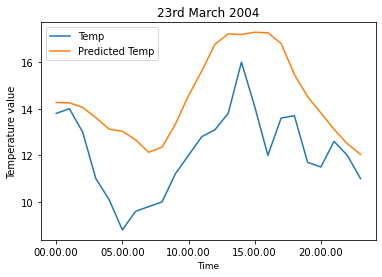

In [986]:
test_date = "2004-03-23"
ax = plt.gca()
ax.set_xlabel("Time",fontsize=9)
ax.set_ylabel("Temperature value",fontsize=10)
ax.set_title('23rd March 2004',fontsize=12);

plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
ax.tick_params(axis='both', which='minor', labelsize=6)
plt.legend(loc=2, prop={'size':10})


test_23rd_real_Temp[test_23rd_real_Temp['Date'] >=  test_date].plot(kind='line',x='Time',y=['Temp'],ax=ax)
test_23rd_real_Temp[test_23rd_real_Temp['Date'] >= test_date].plot(kind='line',x='Time',y=['Predicted Temp'],ax=ax)
#df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)

plt.show()

## Performance analysis

#### CO MAPE

In [993]:
MAPE_23rd_CO=mean_absolute_percentage_error(test_23rd_real_CO[test_23rd_real_CO['Date'] >=  test_date]['CO'],test_23rd_real_CO[test_23rd_real_CO['Date'] >=  test_date]['Predicted CO'])
MAPE_23rd_CO

23.09274066615386

#### Temp MAPE

In [988]:
MAPE_23rd_Temp=mean_absolute_percentage_error(test_23rd_real_Temp[test_23rd_real_Temp['Date'] >=  test_date]['Temp'],test_23rd_real_Temp[test_23rd_real_Temp['Date'] >=  test_date]['Predicted Temp'])
MAPE_23rd_Temp

20.069180728983614

In [994]:
date.append(test_date)
mape_co.append(MAPE_23rd_CO)
mape_temp.append(MAPE_23rd_Temp)

## Prediction for 24th of March

### Preparation of dataset

In [995]:
start_date = "2004-03-11"
end_date = "2004-03-23"
#Preparation of Train dataset
train_22nd=file[file['Date'] <= end_date]
train_22nd_CO = train_22nd['CO']
train_22nd_Temp = train_22nd['Temp']
#Preparation of Test dataset

test_date = "2004-03-24"

test_24th_real_CO=file[file['Date'] <= test_date][['Date','Time','CO']].reset_index()
test_24th_real_Temp=file[file['Date'] <= test_date][['Date','Time','Temp']].reset_index()


### Model Training

In [996]:
model_CO = SARIMAX(train_22nd_CO, order=(2,0,1), seasonal_order=(1, 0, 1, 24), 
                                  enforce_stationarity=False, enforce_invertibility=False).fit()


In [998]:
model_Temp = SARIMAX(train_22nd_Temp, order=(5,0,1), seasonal_order=(3, 0, 2, 24), 
                                  enforce_stationarity=False, enforce_invertibility=False).fit()


C:\Users\Hamzah\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Model Prediction

In [1002]:
# CO
predict_CO=model_CO.predict(0,test_24th_real_CO.shape[0])
test_24th_real_CO['Predicted CO']=predict_CO

In [1003]:
# Temp
predict_Temp=model_Temp.predict(0,test_24th_real_Temp.shape[0])
test_24th_real_Temp['Predicted Temp']=predict_Temp

### Graphical comparison (CO)

No handles with labels found to put in legend.


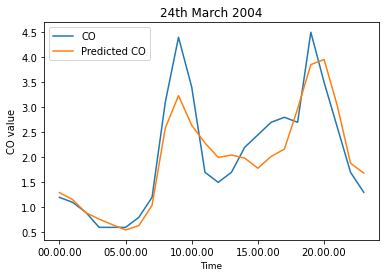

In [1004]:
test_date = "2004-03-24"
ax = plt.gca()
ax.set_xlabel("Time",fontsize=9)
ax.set_ylabel("CO value",fontsize=10)
ax.set_title('24th March 2004',fontsize=12);

plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
ax.tick_params(axis='both', which='minor', labelsize=6)
plt.legend(loc=2, prop={'size':10})


test_24th_real_CO[test_24th_real_CO['Date'] >=  test_date].plot(kind='line',x='Time',y=['CO'],ax=ax)
test_24th_real_CO[test_24th_real_CO['Date'] >= test_date].plot(kind='line',x='Time',y=['Predicted CO'],ax=ax)
#df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)

plt.show()


### Graphical comparison (Temp)

No handles with labels found to put in legend.


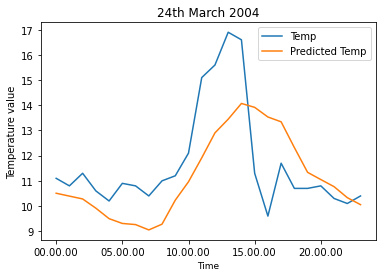

In [1005]:
test_date = "2004-03-24"
ax = plt.gca()
ax.set_xlabel("Time",fontsize=9)
ax.set_ylabel("Temperature value",fontsize=10)
ax.set_title('24th March 2004',fontsize=12);

plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
ax.tick_params(axis='both', which='minor', labelsize=6)
plt.legend(loc=2, prop={'size':10})


test_24th_real_Temp[test_24th_real_Temp['Date'] >=  test_date].plot(kind='line',x='Time',y=['Temp'],ax=ax)
test_24th_real_Temp[test_24th_real_Temp['Date'] >= test_date].plot(kind='line',x='Time',y=['Predicted Temp'],ax=ax)
#df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)

plt.show()

## Performance analysis

#### CO MAPE

In [1006]:
MAPE_24th_CO=mean_absolute_percentage_error(test_24th_real_CO[test_24th_real_CO['Date'] >=  test_date]['CO'],test_24th_real_CO[test_24th_real_CO['Date'] >=  test_date]['Predicted CO'])
MAPE_24th_CO

17.73072960198201

#### Temp MAPE

In [1007]:
MAPE_24th_Temp=mean_absolute_percentage_error(test_24th_real_Temp[test_24th_real_Temp['Date'] >=  test_date]['Temp'],test_24th_real_Temp[test_24th_real_Temp['Date'] >=  test_date]['Predicted Temp'])
MAPE_24th_Temp

12.19976561305839

In [1008]:
date.append(test_date)
mape_co.append(MAPE_24th_CO)
mape_temp.append(MAPE_24th_Temp)

In [1009]:
df = pd.DataFrame(list(zip(date, mape_co,mape_temp)),
               columns =['Date', 'CO MAPE','Temperature MAPE'])

In [1010]:
df

,Date,CO MAPE,Temperature MAPE
0,2004-03-18,19.925035,4.952774
1,2004-03-19,13.339459,15.401401
2,2004-03-20,23.864296,8.320342
3,2004-03-21,26.695224,4.053331
4,2004-03-22,32.119695,8.373755
5,2004-03-23,23.092741,20.069181
6,2004-03-24,17.730730,12.199766


In [1011]:
Mean_MAPE_CO=np.mean(df['CO MAPE'])
Mean_MAPE_CO

22.395311315280647

In [1012]:
Mean_MAPE_Temp=np.mean(df['Temperature MAPE'])
Mean_MAPE_Temp

10.481507217221747